In [2]:
import numpy as np
y_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\train.npz')["y"]
y_test = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\test.npz')["y"]
y_val = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\val.npz')["y"]

y = np.concatenate([y_train, y_test, y_val], axis=0)
print(y.shape)

(2732, 1, 200, 2)


In [8]:
_y = y[:, :, :, 0] 
total_demand_per_node = _y.sum(axis=(0), keepdims=True).squeeze(0).squeeze(0)
print(total_demand_per_node.shape)
# Sort the nodes by their total demand in decreasing order
sorted_nodes = np.argsort(total_demand_per_node)[::-1]
sorted_demand = total_demand_per_node[sorted_nodes]
print(sorted_nodes)

(200,)
[ 45  67  86  66  65  87  44 108  46  64  24  43 107  23  42  68  63 109
 129 128  69  85  90  22  25  47  62   1  21  89 106  20  91   0 127  48
  26 130  88  70 111 112  84  41 110  27 101 151 131 132  92 113   2 150
  83 167 134 152 102 121 146 145 125 165 185  49 153 133 122 166 135  61
 168 156 187 188 186 105  40 157 123 154 124 140 147 141 103  60  81   3
 120 172 155 173 160  82 126 100 179 114 184 144 142 148 189 164 171 174
 104 149 193 178 158 194 199 175 177 195 180 170 192 183 136 163 143 196
 197 191  80   5 176 161   8 169 181  29   4   6   7 198  30  28  50  71
  98  51  99  72  39  11  52  31  94   9 118 137  53 117  74  32  54  10
  97  93  35 159  76 116  57  73  36 119  96  33  55  14  75 182 190  17
  95 115 162  19  77  79 139  78  37  13  34 138  56  58  12  15  16  18
  59  38]


(1912, 1, 200, 2)


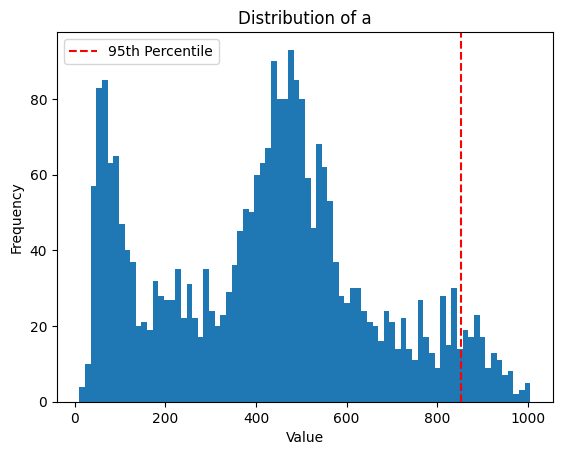

NameError: name 'gaussian_kde' is not defined

In [3]:
print(y_train.shape)
a=y[:, 0, 67, 0]
a=a[a>5]
import matplotlib.pyplot as plt

percentile_95 = np.percentile(a, 95)

# Plot the histogram of variable a
plt.hist(a, bins=80)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of a')

# Add a vertical line at the 95th percentile
plt.axvline(x=percentile_95, color='r', linestyle='--', label='95th Percentile')

plt.legend()
plt.show()

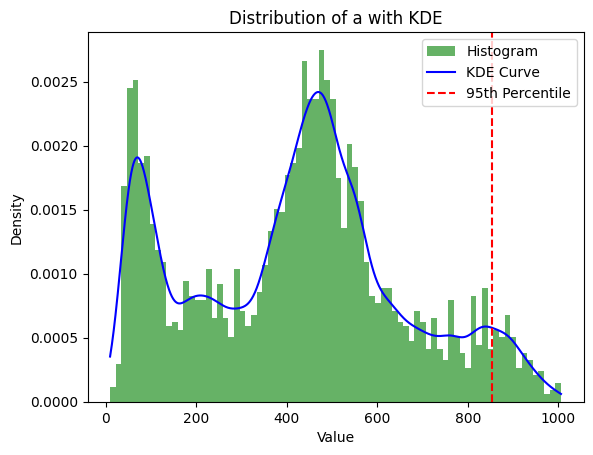

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'a' is already defined from your previous code
percentile_95 = np.percentile(a, 95)

# Plot the histogram of variable 'a'
plt.hist(a, bins=80, density=True, alpha=0.6, color='g', label='Histogram')

# Generate the KDE (Kernel Density Estimate)
kde = gaussian_kde(a, bw_method=0.1)  # You can adjust the bandwidth with bw_method
x_range = np.linspace(a.min(), a.max(), 1000)

# Plot the KDE curve
plt.plot(x_range, kde(x_range), color='blue', label='KDE Curve')

# Add a vertical line at the 95th percentile
plt.axvline(x=percentile_95, color='r', linestyle='--', label='95th Percentile')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of a with KDE')

# Add a legend
plt.legend()

# Show the plot
plt.show()


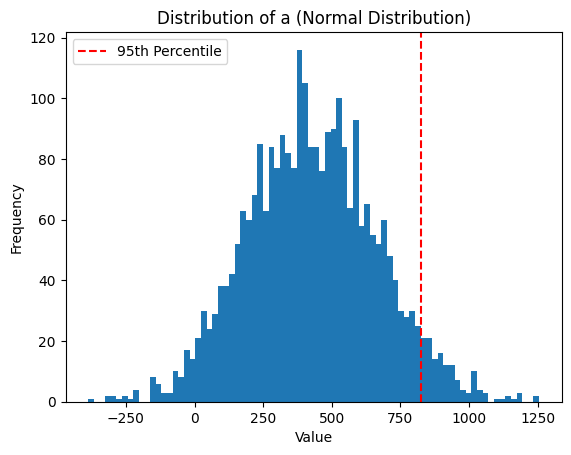

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming a is given as y[:, 0, 67, 0] and filtered to values > 5
a = y[:, 0, 67, 0]
a = a[a > 5]

# Calculate mean, standard deviation, and number of samples from the original data 'a'
mean = np.mean(a)
std_dev = np.std(a)
num_samples = len(a)

# Generate random samples from a normal distribution using calculated mean and standard deviation
a_normal = np.random.normal(mean, std_dev, num_samples)

# Calculate the 95th percentile of the normal distribution values
percentile_95 = np.percentile(a_normal, 95)

# Plot the histogram of the normal distribution values
plt.hist(a_normal, bins=80)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of a (Normal Distribution)')

# Add a vertical line at the 95th percentile
plt.axvline(x=percentile_95, color='r', linestyle='--', label='95th Percentile')

plt.legend()
plt.show()


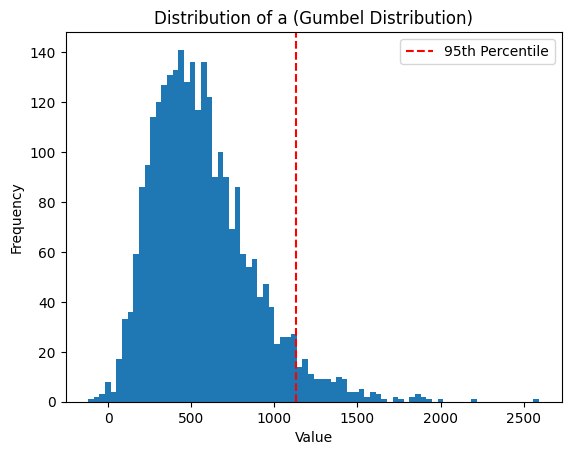

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming a is given as y[:, 0, 67, 0] and filtered to values > 5
a = y[:, 0, 67, 0]
a = a[a > 5]

# Calculate location and scale (similar to mean and standard deviation) from the original data 'a'
location = np.mean(a)
scale = np.std(a)
num_samples = len(a)

# Generate random samples from a Gumbel distribution using the calculated parameters
a_gumbel = np.random.gumbel(location, scale, num_samples)

# Calculate the 95th percentile of the Gumbel distribution values
percentile_95 = np.percentile(a_gumbel, 95)

# Plot the histogram of the Gumbel distribution values
plt.hist(a_gumbel, bins=80)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of a (Gumbel Distribution)')

# Add a vertical line at the 95th percentile
plt.axvline(x=percentile_95, color='r', linestyle='--', label='95th Percentile')

plt.legend()
plt.show()


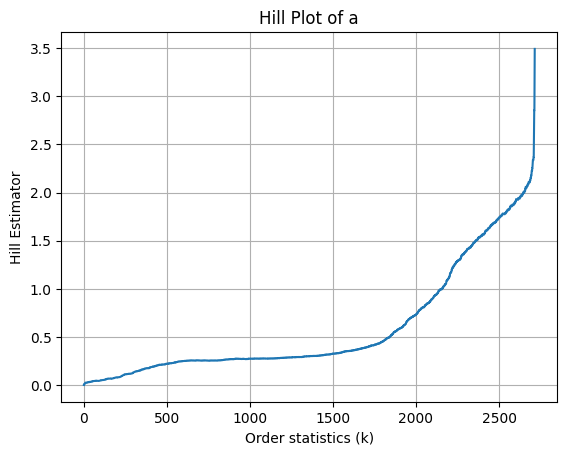

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming a is given as y[:, 0, 67, 0] and filtered to values > 5
a = y[:, 0, 67, 0]
a = a[a > 5]

# Sort the data in descending order
a_sorted = np.sort(a)[::-1]

# Number of tail samples to use in the Hill plot (usually top 5% to 10%)
k_vals = np.arange(1, len(a_sorted))

# Compute the Hill estimator
hill_estimator = np.array([np.mean(np.log(a_sorted[:k]) - np.log(a_sorted[k])) for k in k_vals])

# Plot the Hill plot
plt.plot(k_vals, hill_estimator)
plt.xlabel('Order statistics (k)')
plt.ylabel('Hill Estimator')
plt.title('Hill Plot of a')
plt.grid(True)
plt.show()


In [41]:
# Assuming we are given the value of k and the total number of samples
k_chosen = 1500
total_samples = 1912  # Assuming a sample size of 1500

# Calculate the percentile corresponding to k
percentile = (k_chosen / total_samples) * 100
percentile


78.45188284518828

C:\Users\omera\AppData\Local\Temp\ipykernel_20312\2626410777.py:13: RuntimeWarning: invalid value encountered in log
  hill_estimator = np.array([np.mean(np.log(a_sorted[:k]) - np.log(a_sorted[k])) for k in k_vals])


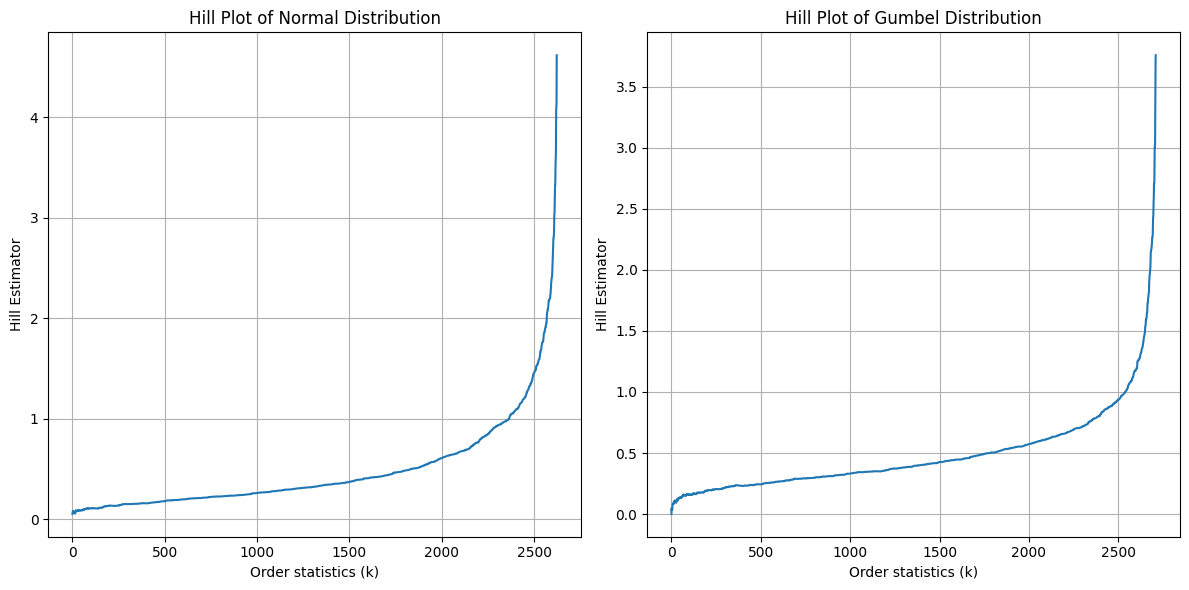

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate and plot Hill plot
def plot_hill(a, title):
    # Sort the data in descending order
    a_sorted = np.sort(a)[::-1]

    # Number of tail samples to use in the Hill plot (usually top 5% to 10%)
    k_vals = np.arange(1, len(a_sorted))

    # Compute the Hill estimator
    hill_estimator = np.array([np.mean(np.log(a_sorted[:k]) - np.log(a_sorted[k])) for k in k_vals])

    # Plot the Hill plot
    plt.plot(k_vals, hill_estimator, label=title)
    plt.xlabel('Order statistics (k)')
    plt.ylabel('Hill Estimator')
    plt.title(f'Hill Plot of {title}')
    plt.grid(True)

# Parameters for normal distribution
mean = np.mean(a)
std_dev = np.std(a)
num_samples = len(a)

# Generate random samples from a normal distribution
normal_samples = np.random.normal(mean, std_dev, num_samples)

# Parameters for Gumbel distribution
location = np.mean(a)
scale = np.std(a)
num_samples = len(a)

# Generate random samples from a Gumbel distribution
gumbel_samples = np.random.gumbel(location, scale, num_samples)

# Plot Hill plots for both distributions
plt.figure(figsize=(12, 6))

# Hill plot for Normal distribution
plt.subplot(1, 2, 1)
plot_hill(normal_samples, 'Normal Distribution')

# Hill plot for Gumbel distribution
plt.subplot(1, 2, 2)
plot_hill(gumbel_samples, 'Gumbel Distribution')

# Show the plots
plt.tight_layout()
plt.show()


17.957163955800933 15.027098233614915


Text(0.5, 1.0, 'Distribution of a (Normal Distribution)')

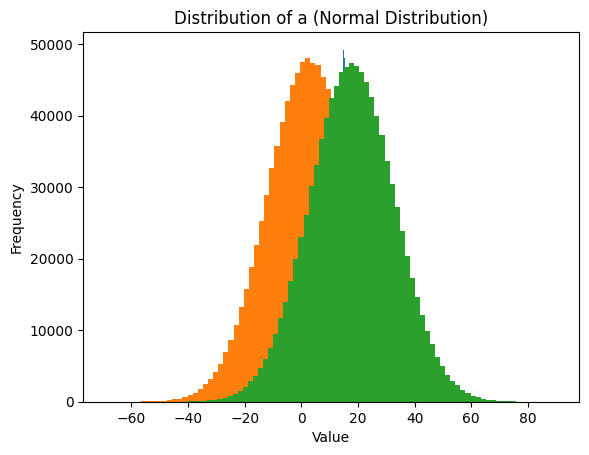

: 

In [47]:
num_samples=1000000
a_normal = np.random.normal(15, 1, num_samples)
b_normal = np.random.normal(3, 15, num_samples)
c_normal = a_normal + b_normal
print(c_normal.mean(), c_normal.std())
# Plot the histogram of the normal distribution values
plt.hist(a_normal, bins=80)
plt.hist(b_normal, bins=80)
plt.hist(c_normal, bins=80)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of a (Normal Distribution)')